In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.contrib.eager as tfe
import matplotlib.pyplot as plt

%matplotlib inline

tfe.enable_eager_execution(device_policy = tfe.DEVICE_PLACEMENT_SILENT)

In [3]:
from draw import DRAW

In [4]:
device = 'gpu:0' if tfe.num_gpus() > 0 else 'cpu:0'

In [5]:
z_dim = 10

In [6]:
draw = DRAW(device_name=device, learning_rate=3e-3, z_dim=z_dim, use_cudnn=True)

In [7]:
# if you already have pretrained model
# draw.load(global_step="latest")

In [8]:
from tensorflow.python.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32') / 255.
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_val = X_test.astype('float32') / 255.
X_val = X_val.reshape((X_val.shape[0], 28 * 28))

In [9]:
draw(tf.convert_to_tensor(X_train[:1]))
draw.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_read_attention_params  multiple                  1285      
_________________________________________________________________
cudnn_compatible_lstm_cell ( multiple                  314368    
_________________________________________________________________
dense_encode_mu (Dense)      multiple                  2570      
_________________________________________________________________
dense_encode_logsigma (Dense multiple                  2570      
_________________________________________________________________
cudnn_compatible_lstm_cell ( multiple                  273408    
_________________________________________________________________
dense_write_attention_params multiple                  1285      
_________________________________________________________________
dense_write_attention_dense  multiple                  6425      
Total para

In [10]:
def reconstruct_test():
    testset = X_test[:10,:,:]      
    img_orig = testset.reshape(-1,28,28)
    img_orig = np.concatenate(img_orig, axis=1)
       
    input_test = testset.astype('float32')/255.
    input_test = input_test.reshape(-1, 28*28)
    input_test = tf.convert_to_tensor(input_test)
    
    plt.imshow(img_orig, cmap="gray")
    plt.show()
    
#     z = draw.extract(input_test)
    canvases = draw(input_test)
    for canvas in canvases:
        img_test = tf.nn.sigmoid(canvas).numpy().reshape(-1,28,28)
        img_test = np.concatenate(img_test, axis=1)

        plt.imshow(img_test, cmap="gray")
        plt.show()

In [20]:
def drawing_test():
    testset = X_test[:10,:,:]      
    img_orig = testset.reshape(-1,28,28)
    img_orig = np.concatenate(img_orig, axis=1)
       
    input_test = testset.astype('float32')/255.
    input_test = input_test.reshape(-1, 28*28)
    input_test = tf.convert_to_tensor(input_test)
    
    plt.imshow(img_orig, cmap="gray")
    plt.show()
    
    z = draw.extract(input_test)
    canvases = draw.draw(z)
    for canvas in canvases:
        img_test = tf.nn.sigmoid(canvas).numpy().reshape(-1,28,28)
        img_test = np.concatenate(img_test, axis=1)

        plt.imshow(img_test, cmap="gray")
        plt.show()

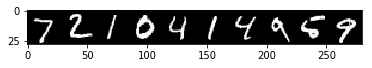

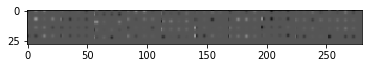

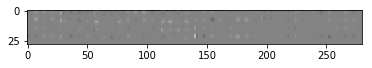

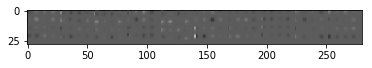

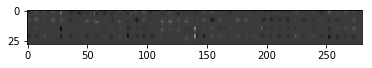

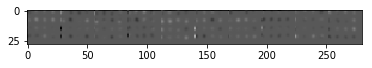

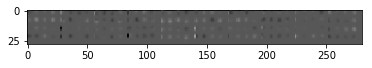

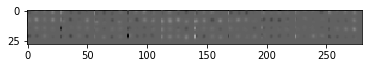

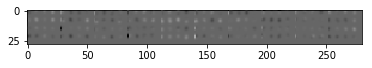

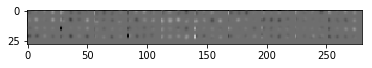

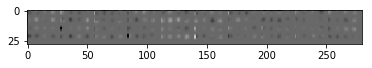

In [11]:
reconstruct_test()

In [ ]:
drawing_test()

VAL     1: 100%|██████████| 40/40 [00:04<00:00,  8.87it/s]


[EPOCH 1 / STEP 1]
TRAIN loss   : 242.6553
RECON loss   : 240.4270
KL    loss   : 2.2282
[EPOCH 1 / STEP 1]
TRAIN loss   : 200.4786
RECON loss   : 198.4064
KL    loss   : 2.0723
saved step 1 in checkpoints/


VAL     3: 100%|██████████| 40/40 [00:04<00:00,  8.85it/s]


[EPOCH 3 / STEP 3]
TRAIN loss   : 175.0198
RECON loss   : 165.3845
KL    loss   : 9.6352
[EPOCH 3 / STEP 3]
TRAIN loss   : 164.7247
RECON loss   : 153.2581
KL    loss   : 11.4667
saved step 3 in checkpoints/


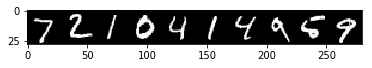

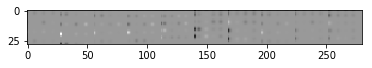

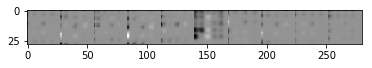

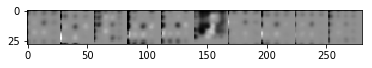

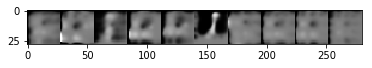

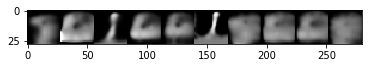

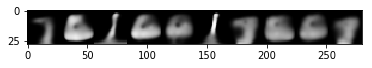

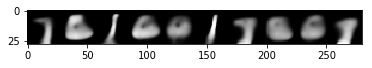

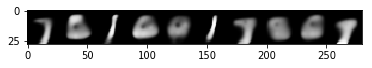

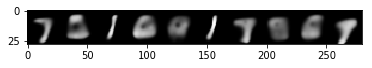

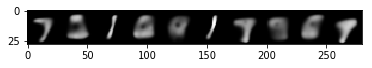

VAL     4: 100%|██████████| 40/40 [00:04<00:00,  8.84it/s]


[EPOCH 1 / STEP 4]
TRAIN loss   : 158.7716
RECON loss   : 145.4122
KL    loss   : 13.3594
[EPOCH 1 / STEP 4]
TRAIN loss   : 152.1405
RECON loss   : 137.7103
KL    loss   : 14.4302
saved step 4 in checkpoints/


VAL     6: 100%|██████████| 40/40 [00:04<00:00,  7.80it/s]


[EPOCH 3 / STEP 6]
TRAIN loss   : 136.5843
RECON loss   : 118.4082
KL    loss   : 18.1761
[EPOCH 3 / STEP 6]
TRAIN loss   : 131.7932
RECON loss   : 113.2897
KL    loss   : 18.5036
saved step 6 in checkpoints/


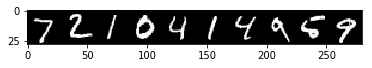

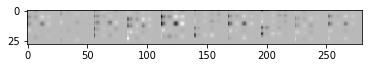

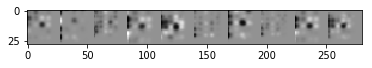

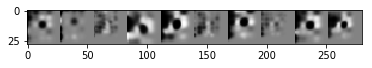

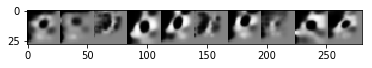

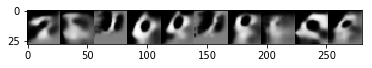

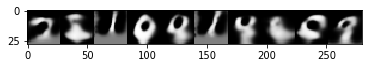

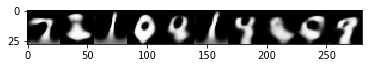

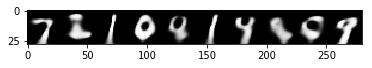

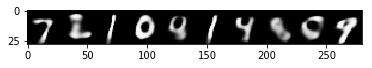

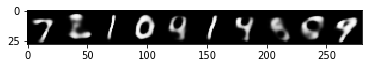

VAL     7: 100%|██████████| 40/40 [00:04<00:00,  7.69it/s]


[EPOCH 1 / STEP 7]
TRAIN loss   : 129.4316
RECON loss   : 110.1274
KL    loss   : 19.3042
[EPOCH 1 / STEP 7]
TRAIN loss   : 126.2841
RECON loss   : 106.3371
KL    loss   : 19.9470
saved step 7 in checkpoints/


VAL     9: 100%|██████████| 40/40 [00:04<00:00,  8.66it/s]


[EPOCH 3 / STEP 9]
TRAIN loss   : 121.5386
RECON loss   : 101.1722
KL    loss   : 20.3664
[EPOCH 3 / STEP 9]
TRAIN loss   : 121.9520
RECON loss   : 101.5392
KL    loss   : 20.4128
saved step 9 in checkpoints/


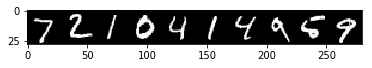

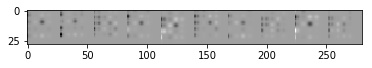

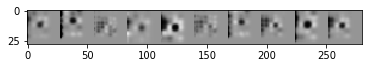

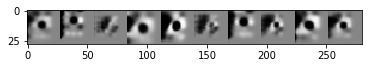

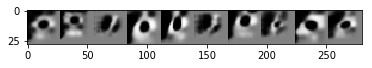

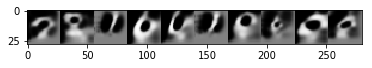

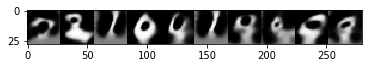

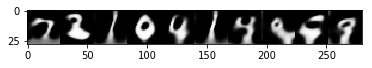

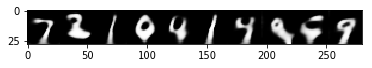

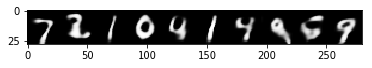

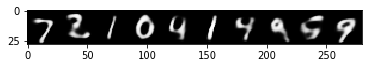

VAL    10: 100%|██████████| 40/40 [00:04<00:00,  8.82it/s]


[EPOCH 1 / STEP 10]
TRAIN loss   : 119.1888
RECON loss   : 98.5261
KL    loss   : 20.6627
[EPOCH 1 / STEP 10]
TRAIN loss   : 116.9359
RECON loss   : 96.0791
KL    loss   : 20.8568
saved step 10 in checkpoints/


VAL    12: 100%|██████████| 40/40 [00:04<00:00,  7.71it/s]


[EPOCH 3 / STEP 12]
TRAIN loss   : 115.4856
RECON loss   : 94.5056
KL    loss   : 20.9800
[EPOCH 3 / STEP 12]
TRAIN loss   : 114.2711
RECON loss   : 93.1380
KL    loss   : 21.1330
saved step 12 in checkpoints/


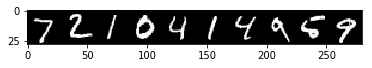

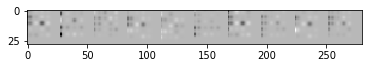

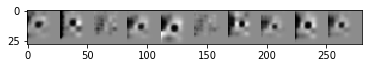

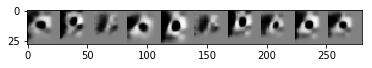

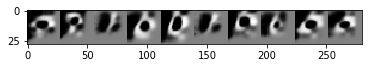

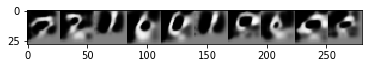

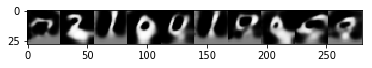

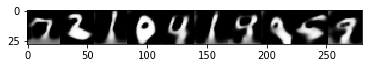

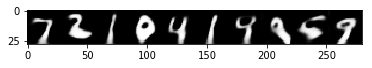

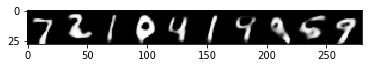

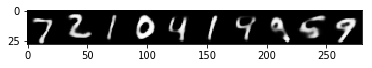

VAL    13: 100%|██████████| 40/40 [00:04<00:00,  8.76it/s]


[EPOCH 1 / STEP 13]
TRAIN loss   : 114.0681
RECON loss   : 92.9897
KL    loss   : 21.0784
[EPOCH 1 / STEP 13]
TRAIN loss   : 111.9726
RECON loss   : 90.7850
KL    loss   : 21.1876
saved step 13 in checkpoints/


VAL    15: 100%|██████████| 40/40 [00:04<00:00,  8.68it/s]


[EPOCH 3 / STEP 15]
TRAIN loss   : 111.7671
RECON loss   : 90.5076
KL    loss   : 21.2594
[EPOCH 3 / STEP 15]
TRAIN loss   : 109.9155
RECON loss   : 88.7841
KL    loss   : 21.1314
saved step 15 in checkpoints/


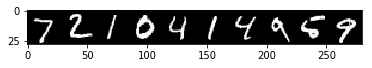

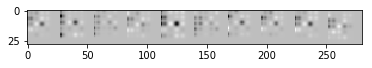

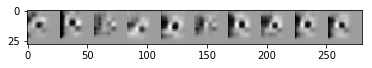

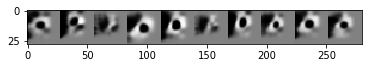

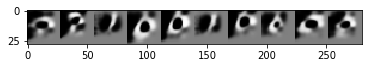

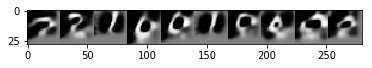

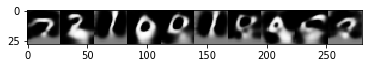

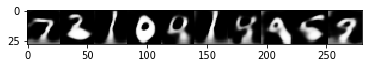

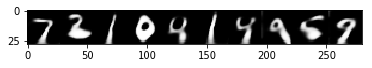

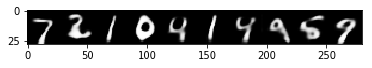

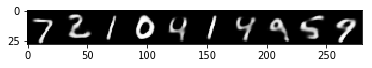

VAL    16: 100%|██████████| 40/40 [00:04<00:00,  7.73it/s]


[EPOCH 1 / STEP 16]
TRAIN loss   : 110.8529
RECON loss   : 89.5188
KL    loss   : 21.3341
[EPOCH 1 / STEP 16]
TRAIN loss   : 110.6473
RECON loss   : 89.7134
KL    loss   : 20.9339
saved step 16 in checkpoints/


VAL    18: 100%|██████████| 40/40 [00:04<00:00,  7.76it/s]


[EPOCH 3 / STEP 18]
TRAIN loss   : 109.3047
RECON loss   : 87.8665
KL    loss   : 21.4381
[EPOCH 3 / STEP 18]
TRAIN loss   : 108.7121
RECON loss   : 87.5301
KL    loss   : 21.1820
saved step 18 in checkpoints/


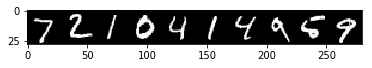

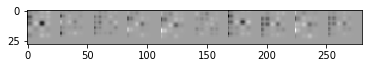

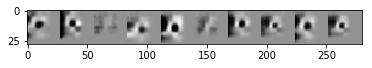

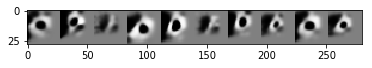

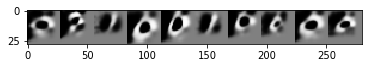

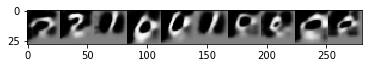

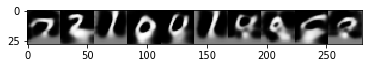

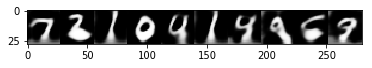

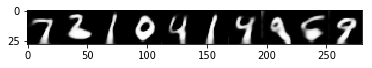

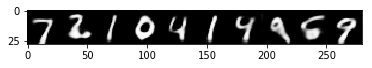

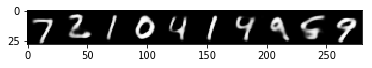

VAL    19: 100%|██████████| 40/40 [00:04<00:00,  8.87it/s]


[EPOCH 1 / STEP 19]
TRAIN loss   : 108.5487
RECON loss   : 87.0969
KL    loss   : 21.4518
[EPOCH 1 / STEP 19]
TRAIN loss   : 107.9125
RECON loss   : 86.1506
KL    loss   : 21.7619
saved step 19 in checkpoints/


VAL    21: 100%|██████████| 40/40 [00:04<00:00,  7.85it/s]


[EPOCH 3 / STEP 21]
TRAIN loss   : 107.3736
RECON loss   : 85.8397
KL    loss   : 21.5339
[EPOCH 3 / STEP 21]
TRAIN loss   : 107.2053
RECON loss   : 85.5528
KL    loss   : 21.6525
saved step 21 in checkpoints/


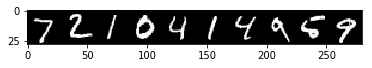

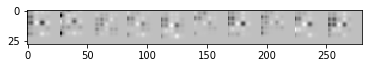

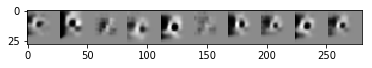

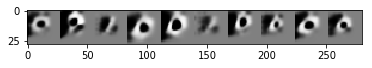

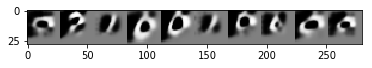

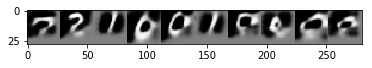

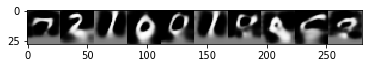

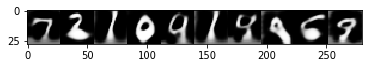

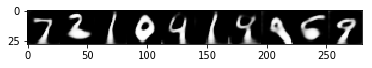

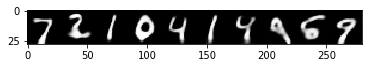

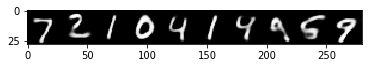

VAL    22: 100%|██████████| 40/40 [00:04<00:00,  7.70it/s]


[EPOCH 1 / STEP 22]
TRAIN loss   : 106.6617
RECON loss   : 85.1279
KL    loss   : 21.5338
[EPOCH 1 / STEP 22]
TRAIN loss   : 105.9852
RECON loss   : 84.3661
KL    loss   : 21.6190
saved step 22 in checkpoints/


VAL    24: 100%|██████████| 40/40 [00:04<00:00,  8.91it/s]


[EPOCH 3 / STEP 24]
TRAIN loss   : 105.5972
RECON loss   : 83.9812
KL    loss   : 21.6160
[EPOCH 3 / STEP 24]
TRAIN loss   : 105.7425
RECON loss   : 83.9431
KL    loss   : 21.7995
saved step 24 in checkpoints/


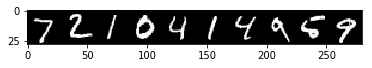

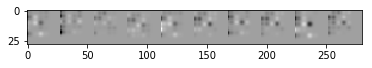

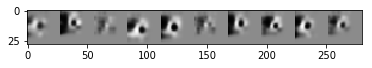

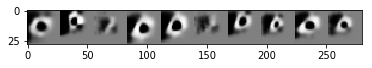

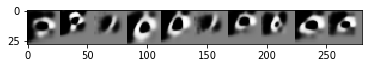

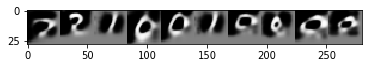

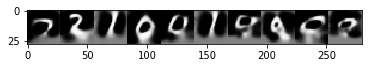

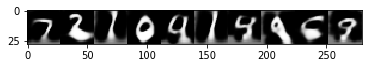

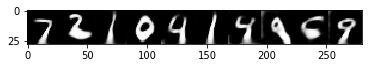

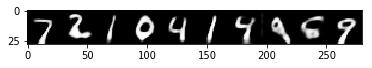

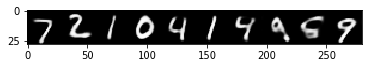

VAL    25: 100%|██████████| 40/40 [00:04<00:00,  7.83it/s]


[EPOCH 1 / STEP 25]
TRAIN loss   : 105.3539
RECON loss   : 83.7284
KL    loss   : 21.6255
[EPOCH 1 / STEP 25]
TRAIN loss   : 103.6680
RECON loss   : 82.0791
KL    loss   : 21.5890
saved step 25 in checkpoints/


VAL    27: 100%|██████████| 40/40 [00:04<00:00,  8.91it/s]


[EPOCH 3 / STEP 27]
TRAIN loss   : 104.5044
RECON loss   : 82.8641
KL    loss   : 21.6403
[EPOCH 3 / STEP 27]
TRAIN loss   : 103.6494
RECON loss   : 82.0065
KL    loss   : 21.6430
saved step 27 in checkpoints/


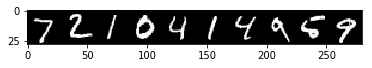

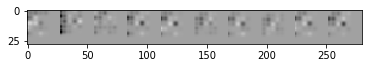

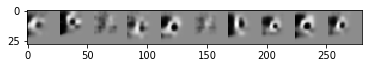

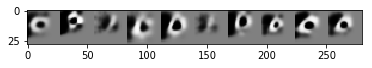

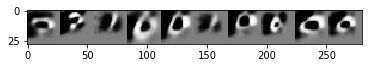

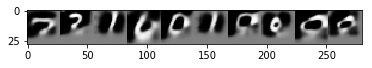

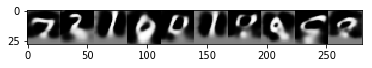

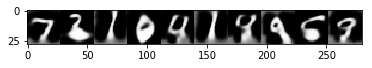

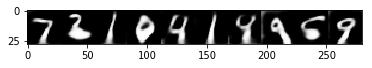

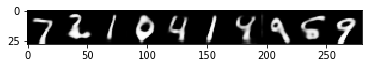

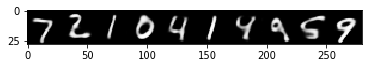

VAL    28: 100%|██████████| 40/40 [00:04<00:00,  8.73it/s]


[EPOCH 1 / STEP 28]
TRAIN loss   : 104.1028
RECON loss   : 82.4701
KL    loss   : 21.6327
[EPOCH 1 / STEP 28]
TRAIN loss   : 103.2675
RECON loss   : 81.5335
KL    loss   : 21.7340
saved step 28 in checkpoints/


VAL    30: 100%|██████████| 40/40 [00:04<00:00,  8.93it/s]


[EPOCH 3 / STEP 30]
TRAIN loss   : 103.3642
RECON loss   : 81.6912
KL    loss   : 21.6730
[EPOCH 3 / STEP 30]
TRAIN loss   : 102.1099
RECON loss   : 80.4810
KL    loss   : 21.6290
saved step 30 in checkpoints/


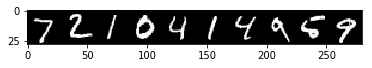

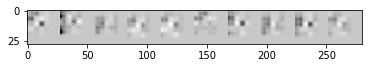

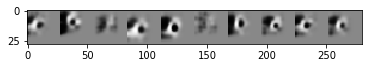

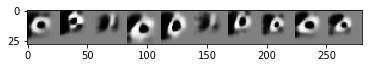

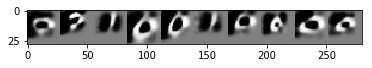

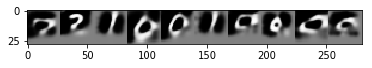

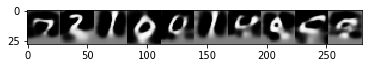

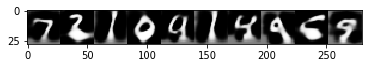

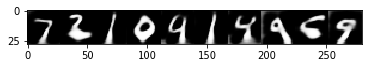

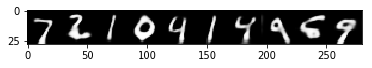

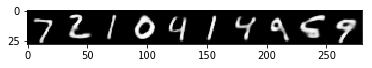

In [12]:
# if you want to train
for i in range(10):
    draw.fit(X_train, X_val, saving=True, epochs=3, batch_size=256, verbose=3, tqdm_option='normal')
    reconstruct_test()
#     drawingtest()

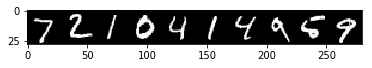

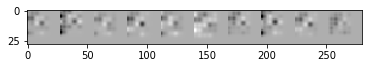

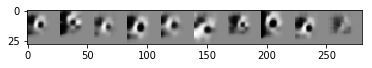

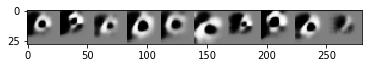

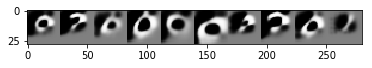

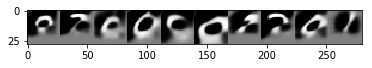

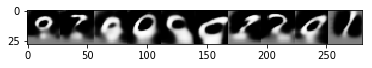

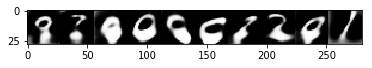

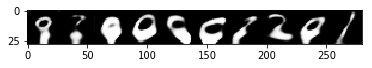

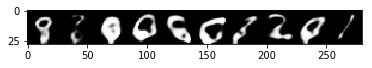

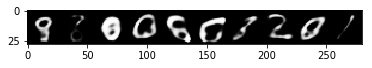

In [21]:
drawing_test()